In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the csv file
project= pd.read_csv("c:/Users/ME/Desktop/Real_Estate_Sales_2001-2020_GL.csv")

In [3]:
# checking the first five rows to explore the dataframe
project.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020.0,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020.0,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020.0,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020.0,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020.0,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [4]:
# checking the data summary to explore the data. 
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693365 entries, 0 to 693364
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     693365 non-null  object 
 1   List Year         693361 non-null  float64
 2   Date Recorded     693359 non-null  object 
 3   Town              693361 non-null  object 
 4   Address           693313 non-null  object 
 5   Assessed Value    693361 non-null  object 
 6   Sale Amount       693360 non-null  float64
 7   Sales Ratio       693360 non-null  float64
 8   Property Type     335422 non-null  object 
 9   Residential Type  329559 non-null  object 
 10  Non Use Code      189982 non-null  object 
 11  Assessor Remarks  75344 non-null   object 
 12  OPM remarks       1989 non-null    object 
 13  Location          147695 non-null  object 
dtypes: float64(3), object(11)
memory usage: 74.1+ MB


In [5]:
# converting date column to date time
project["Date Recorded"]= pd.to_datetime(project["Date Recorded"])

In [6]:
# extracting Sale Year and Sale Month Features
project["Sale Year"] = project['Date Recorded'].dt.year
project["Sale Month"] = project['Date Recorded'].dt.month

In [7]:
# dropping columns(Serial Number, Date Recorded, List Year,Sales Ratio, Non Use Code, Assessor Remarks,Opm Remarks, Location)
project.drop(["Serial Number","Date Recorded","List Year","Sales Ratio","Non Use Code","Assessor Remarks","OPM remarks","Location"], axis=1, inplace=True)

In [8]:
# Extracting the 2021 data frame
data2021=project[project['Sale Year']==2021 ]

In [9]:
# Extracting the 2020 data from the data frame
data2020=project[project['Sale Year']==2020 ]

In [10]:
# Extracting the month of october to december from 2020 data
dataocttodec2020= data2020[data2020['Sale Month']>9]

In [11]:

dataocttodec2020.head()

,Town,Address,Assessed Value,Sale Amount,Property Type,Residential Type,Sale Year,Sale Month
1,Ashford,390 TURNPIKE RD,253000.0,430000.0,Residential,Single Family,2020.0,10.0
5,Avon,57 FAR HILLS DRIVE,847520.0,1250000.0,Residential,Single Family,2020.0,12.0
9,Bethel,16 DEEPWOOD DRIVE,171360.0,335000.0,Residential,Single Family,2020.0,12.0
15,Bristol,9 LESLIE COURT,94920.0,155000.0,Residential,Single Family,2020.0,10.0
16,Bristol,391 TIFFANY LA,173740.0,299000.0,Residential,Single Family,2020.0,12.0


In [12]:
data2021.head()

,Town,Address,Assessed Value,Sale Amount,Property Type,Residential Type,Sale Year,Sale Month
0,Ansonia,230 WAKELEE AVE,150500.0,325000.0,Commercial,NaN,2021.0,9.0
2,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,Residential,Condo,2021.0,3.0
3,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,Residential,Single Family,2021.0,4.0
4,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,Residential,Single Family,2021.0,7.0
6,Berlin,1539 FARMINGTON AVE,234200.0,130000.0,Residential,Two Family,2021.0,3.0


In [13]:
# joining data from (october to december 2020) to 2021 to obtain data for financial year 2021, since financial year 2021 starts from 1st october 2020
dataFY2021=pd.concat([dataocttodec2020,data2021], axis=0)

In [14]:
dataFY2021

,Town,Address,Assessed Value,Sale Amount,Property Type,Residential Type,Sale Year,Sale Month
1,Ashford,390 TURNPIKE RD,253000.0,430000.0,Residential,Single Family,2020.0,10.0
5,Avon,57 FAR HILLS DRIVE,847520.0,1250000.0,Residential,Single Family,2020.0,12.0
9,Bethel,16 DEEPWOOD DRIVE,171360.0,335000.0,Residential,Single Family,2020.0,12.0
15,Bristol,9 LESLIE COURT,94920.0,155000.0,Residential,Single Family,2020.0,10.0
16,Bristol,391 TIFFANY LA,173740.0,299000.0,Residential,Single Family,2020.0,12.0
...,...,...,...,...,...,...,...,...
66823,Trumbull,56 GOLDEN HILL RD,315490.0,520000.0,Residential,Single Family,2021.0,2.0
66824,Vernon,350 TALCOTTVILLE RD,1820300.0,7986111.0,Commercial,NaN,2021.0,7.0
66825,Windsor,40 LAST LEAF CIR,134260.0,252000.0,Residential,Condo,2021.0,7.0
66830,Torrington,21 PROSPECT ST UNIT 3,40190.0,52500.0,Residential,Condo,2021.0,4.0


In [15]:
# exploring the sale month column to ensure that all the 12 months are present 
dataFY2021['Sale Month'].value_counts()

6.0     6623
7.0     6441
8.0     6225
10.0    6219
12.0    6133
11.0    5799
9.0     5683
5.0     5366
4.0     5004
3.0     4999
1.0     4462
2.0     3638
Name: Sale Month, dtype: int64

In [16]:
# saving the financial year 2021 data frame into a csv file
dataFY2021.to_csv('real_estates_FY2021.csv', index=False)

In [17]:
# reading the saves csv file
data=pd.read_csv("real_estates_FY2021.csv")

In [18]:
# exploring the saved dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66592 entries, 0 to 66591
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Town              66592 non-null  object 
 1   Address           66592 non-null  object 
 2   Assessed Value    66592 non-null  float64
 3   Sale Amount       66592 non-null  float64
 4   Property Type     66591 non-null  object 
 5   Residential Type  60728 non-null  object 
 6   Sale Year         66592 non-null  float64
 7   Sale Month        66592 non-null  float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


In [19]:
# checking for null values
data.isnull().sum()

Town                   0
Address                0
Assessed Value         0
Sale Amount            0
Property Type          1
Residential Type    5864
Sale Year              0
Sale Month             0
dtype: int64

In [20]:
 # Drop null values in the Property Type column
data.dropna(subset=["Property Type"], inplace=True)

In [21]:
data.isna().sum()

Town                   0
Address                0
Assessed Value         0
Sale Amount            0
Property Type          0
Residential Type    5863
Sale Year              0
Sale Month             0
dtype: int64

In [22]:
# filling in null values in the Residential Type Feature with a constant known as "Missing"
data['Residential Type']=data['Residential Type'].fillna('Missing')

In [23]:
data.isna().sum()

Town                0
Address             0
Assessed Value      0
Sale Amount         0
Property Type       0
Residential Type    0
Sale Year           0
Sale Month          0
dtype: int64

In [24]:
data.head()

,Town,Address,Assessed Value,Sale Amount,Property Type,Residential Type,Sale Year,Sale Month
0,Ashford,390 TURNPIKE RD,253000.0,430000.0,Residential,Single Family,2020.0,10.0
1,Avon,57 FAR HILLS DRIVE,847520.0,1250000.0,Residential,Single Family,2020.0,12.0
2,Bethel,16 DEEPWOOD DRIVE,171360.0,335000.0,Residential,Single Family,2020.0,12.0
3,Bristol,9 LESLIE COURT,94920.0,155000.0,Residential,Single Family,2020.0,10.0
4,Bristol,391 TIFFANY LA,173740.0,299000.0,Residential,Single Family,2020.0,12.0


In [25]:
# dropping the sale year column
data.drop("Sale Year", axis=1, inplace=True)

In [26]:
data.head(2)

,Town,Address,Assessed Value,Sale Amount,Property Type,Residential Type,Sale Month
0,Ashford,390 TURNPIKE RD,253000.0,430000.0,Residential,Single Family,10.0
1,Avon,57 FAR HILLS DRIVE,847520.0,1250000.0,Residential,Single Family,12.0


In [27]:
# checking for the minimun Sale Amount
data['Sale Amount'].min()

2000.0

In [28]:
data["Assessed Value"].value_counts()

0.0          172
18200.0       65
1100.0        55
191660.0      37
46900.0       33
            ... 
157130.0       1
310600.0       1
1889020.0      1
3621520.0      1
40190.0        1
Name: Assessed Value, Length: 28884, dtype: int64

In [29]:
# checking for rows with Assessed Values equated to zero
index_names = data[data["Assessed Value"]==0].index
index_names

Int64Index([  316,   801,   853,  1069,  1264,  1875,  2002,  2370,  2462,
             3107,
            ...
            64520, 64623, 65005, 65020, 65145, 65387, 65586, 65966, 66036,
            66269],
           dtype='int64', length=172)

In [30]:
# dropping rows with assessed values equating to 0
data.drop(index_names, inplace=True )


In [31]:
data["Assessed Value"].min()

1.0

In [32]:
# dealing with outliers
# define a function called boxplot

def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show

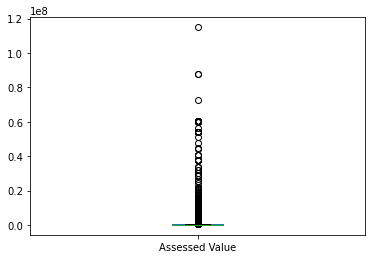

In [33]:
plot_boxplot(data, "Assessed Value")

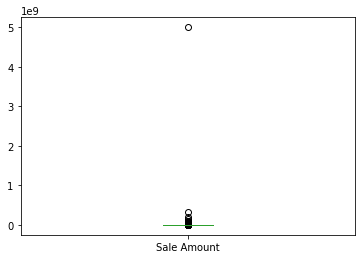

In [34]:
plot_boxplot(data, "Sale Amount")

### Removing Outliers

In [35]:
# defining a function called outliers which returns a list of indices of outliers
def outliers(df, ft):
    Q1= df[ft].quantile(0.25)
    Q3= df[ft].quantile(0.75)
    IQR= Q3 - Q1
    
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    # create a list to store the indeces of the outliers
    
    ls = df.index[(df[ft]<lower_bound) | (df[ft]> upper_bound)]
    
    return ls

In [36]:
# creat an empty list to store the output indices from multiple columns

index_list = []
for feature in ['Assessed Value', 'Sale Amount']:
    index_list.extend(outliers(data,feature))

In [37]:
index_list

[1,
 18,
 41,
 43,
 69,
 87,
 95,
 96,
 97,
 108,
 127,
 134,
 142,
 147,
 150,
 164,
 167,
 169,
 191,
 193,
 194,
 225,
 235,
 239,
 254,
 259,
 264,
 265,
 272,
 299,
 308,
 309,
 333,
 339,
 340,
 361,
 366,
 370,
 375,
 376,
 377,
 391,
 392,
 399,
 401,
 418,
 420,
 435,
 437,
 442,
 452,
 455,
 462,
 469,
 483,
 485,
 488,
 490,
 508,
 512,
 516,
 517,
 519,
 525,
 526,
 528,
 536,
 542,
 550,
 554,
 563,
 594,
 600,
 614,
 619,
 623,
 643,
 647,
 651,
 663,
 690,
 703,
 709,
 711,
 712,
 733,
 738,
 743,
 756,
 758,
 769,
 774,
 776,
 785,
 802,
 816,
 818,
 820,
 842,
 844,
 847,
 854,
 855,
 873,
 883,
 886,
 890,
 898,
 907,
 916,
 923,
 924,
 925,
 927,
 932,
 937,
 943,
 944,
 946,
 960,
 971,
 973,
 974,
 993,
 996,
 1008,
 1010,
 1011,
 1012,
 1065,
 1087,
 1102,
 1103,
 1107,
 1111,
 1117,
 1127,
 1149,
 1151,
 1160,
 1174,
 1184,
 1190,
 1197,
 1206,
 1217,
 1224,
 1234,
 1242,
 1267,
 1269,
 1286,
 1303,
 1306,
 1307,
 1316,
 1317,
 1319,
 1322,
 1340,
 1342,
 1360,
 

In [38]:
# define a function called remove which returns a clean dataframe without outliers

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [39]:
df_cleaned = remove(data, index_list)

In [40]:
df_cleaned.shape

(59209, 7)

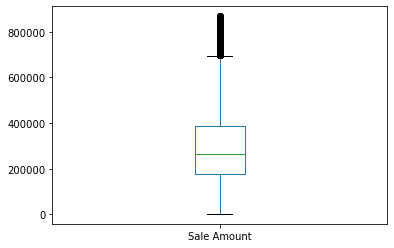

In [41]:
plot_boxplot(df_cleaned, "Sale Amount")

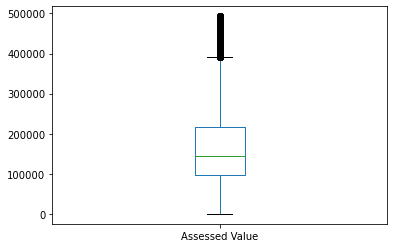

In [42]:
plot_boxplot(df_cleaned, "Assessed Value")

In [43]:
# obtaining the descriptive statistics
df_cleaned.describe()

,Assessed Value,Sale Amount,Sale Month
count,59209.000000,59209.000000,59209.000000
mean,165938.159570,296491.960847,6.898596
std,97036.956359,169034.497474,3.328492
min,1.000000,2000.000000,1.000000
25%,98000.000000,177500.000000,4.000000
50%,143780.000000,264000.000000,7.000000
75%,215700.000000,385000.000000,10.000000
max,493040.000000,868000.000000,12.000000


In [44]:
# renaming columns to remove the word spacing in the column name
df_cleaned.set_axis(['Town', 'Address','Assessed_Value','Sale_Amount','Property_Type', 'Residential_Type', 'Sale_Month'],axis='columns', inplace=True)

In [45]:
# checking the first five rows of df_cleaned dataframe
df_cleaned.head()

,Town,Address,Assessed_Value,Sale_Amount,Property_Type,Residential_Type,Sale_Month
0,Ashford,390 TURNPIKE RD,253000.0,430000.0,Residential,Single Family,10.0
2,Bethel,16 DEEPWOOD DRIVE,171360.0,335000.0,Residential,Single Family,12.0
3,Bristol,9 LESLIE COURT,94920.0,155000.0,Residential,Single Family,10.0
4,Bristol,391 TIFFANY LA,173740.0,299000.0,Residential,Single Family,12.0
5,Brookfield,4 CHELSEA CT,105110.0,160000.0,Residential,Condo,11.0


In [46]:
# Saving the dataframe
df_cleaned.to_csv("real_estate_FY2021_cleaned_project2.csv", index=False)

In [47]:
# reading the saved dataframe
data1=pd.read_csv('real_estate_FY2021_cleaned_project2.csv')
data1.head()

,Town,Address,Assessed_Value,Sale_Amount,Property_Type,Residential_Type,Sale_Month
0,Ashford,390 TURNPIKE RD,253000.0,430000.0,Residential,Single Family,10.0
1,Bethel,16 DEEPWOOD DRIVE,171360.0,335000.0,Residential,Single Family,12.0
2,Bristol,9 LESLIE COURT,94920.0,155000.0,Residential,Single Family,10.0
3,Bristol,391 TIFFANY LA,173740.0,299000.0,Residential,Single Family,12.0
4,Brookfield,4 CHELSEA CT,105110.0,160000.0,Residential,Condo,11.0


In [48]:
data1.head()

,Town,Address,Assessed_Value,Sale_Amount,Property_Type,Residential_Type,Sale_Month
0,Ashford,390 TURNPIKE RD,253000.0,430000.0,Residential,Single Family,10.0
1,Bethel,16 DEEPWOOD DRIVE,171360.0,335000.0,Residential,Single Family,12.0
2,Bristol,9 LESLIE COURT,94920.0,155000.0,Residential,Single Family,10.0
3,Bristol,391 TIFFANY LA,173740.0,299000.0,Residential,Single Family,12.0
4,Brookfield,4 CHELSEA CT,105110.0,160000.0,Residential,Condo,11.0


array([[<AxesSubplot:title={'center':'Assessed_Value'}>,
        <AxesSubplot:title={'center':'Sale_Amount'}>],
       [<AxesSubplot:title={'center':'Sale_Month'}>, <AxesSubplot:>]],
      dtype=object)

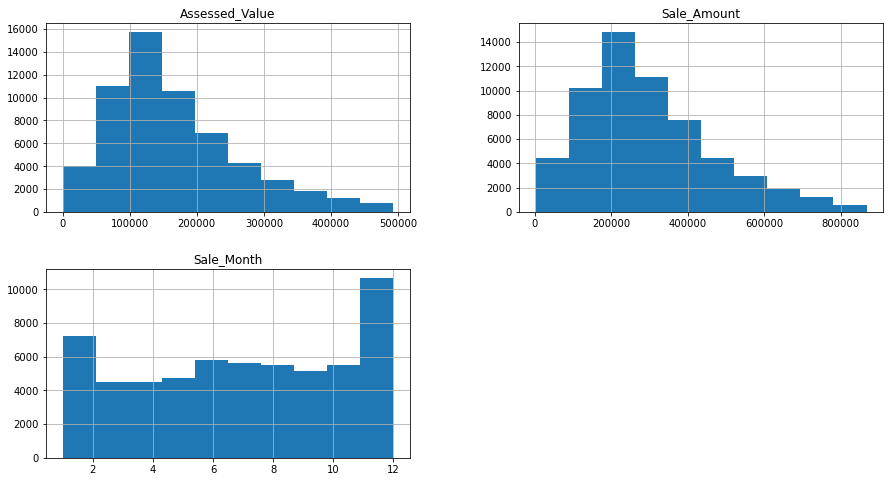

In [49]:
# plotting histograms for each numerical column to check the data distribution
data1.hist(figsize=(15,8))

<AxesSubplot:>

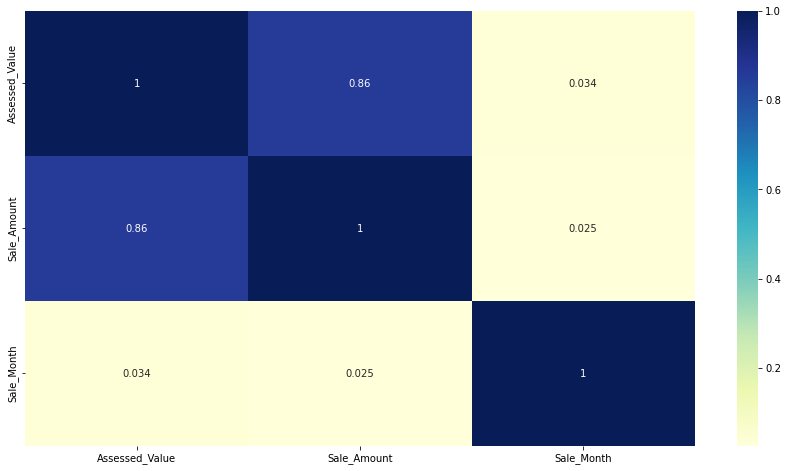

In [50]:
# plotting a heatmap to obtaing the correlation between the numerical features
plt.figure(figsize=(15,8))
sns.heatmap(data1.corr(), annot=True, cmap="YlGnBu")

In [51]:
#using a pandas method called api that detects the types or checks for the string datatype in any column.
pd.api.types.is_string_dtype(data1["Assessed_Value"])

False

In [52]:
# Find the columns which contain strings
for label, content in data1.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Town
Address
Property_Type
Residential_Type


In [53]:
# This will turn all of the string value into category values
for label, content in data1.items():
    if pd.api.types.is_string_dtype(content):
        data1[label] = content.astype("category").cat.as_ordered()

In [54]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59209 entries, 0 to 59208
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Town              59209 non-null  category
 1   Address           59209 non-null  category
 2   Assessed_Value    59209 non-null  float64 
 3   Sale_Amount       59209 non-null  float64 
 4   Property_Type     59209 non-null  category
 5   Residential_Type  59209 non-null  category
 6   Sale_Month        59209 non-null  float64 
dtypes: category(4), float64(3)
memory usage: 4.3 MB


In [55]:
# Turn categorical variables into numbers
for label, content in data1.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers
        data1[label] = pd.Categorical(content).codes

In [56]:
data1.head()

,Town,Address,Assessed_Value,Sale_Amount,Property_Type,Residential_Type,Sale_Month
0,2,34066,253000.0,430000.0,4,3,10.0
1,8,12586,171360.0,335000.0,4,3,12.0
2,16,54024,94920.0,155000.0,4,3,10.0
3,16,34080,173740.0,299000.0,4,3,12.0
4,17,34288,105110.0,160000.0,4,0,11.0


In [57]:
# saving encoded dataframe
data1.to_csv("real_estate_FY2021_encodeded.csv", index=False)

In [58]:
# split Data into X and y  
X = data1.drop("Sale_Amount", axis=1)
y= data1["Sale_Amount"]

In [59]:
# splitting the data into the train_test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((47367, 6), (11842, 6), (47367,), (11842,))

In [60]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
reg = BaggingRegressor()
reg.fit(X_train, y_train)

BaggingRegressor()

In [61]:
reg.score(X_train, y_train)

0.9557015826070558

In [62]:
reg.score(X_test, y_test)

0.7418754958812539

In [63]:
%%time
from sklearn.ensemble import RandomForestRegressor
#Initiate model
model = RandomForestRegressor(
                             )
model.fit(X_train, y_train)

CPU times: total: 19.3 s
Wall time: 19.6 s


RandomForestRegressor()

In [64]:
model.score(X_train, y_train)

0.9678088209035972

In [65]:
model.score(X_test, y_test)

0.7629426436076325

In [66]:
%%time
from sklearn import linear_model
#Initiate model
model2 = linear_model.LinearRegression(
                             )
model2.fit(X_train, y_train)

CPU times: total: 62.5 ms
Wall time: 27 ms


LinearRegression()

In [67]:
model2.score(X_train, y_train)

0.7380909641965041

In [68]:
model2.score(X_test, y_test)

0.7222825965165862

In [69]:
# normalizing the dataframe
from sklearn import preprocessing 
d=preprocessing.normalize(X)
X_scaled_data=pd.DataFrame(d, columns=X.columns)
X_scaled_data.head()

,Town,Address,Assessed_Value,Property_Type,Residential_Type,Sale_Month
0,0.000008,0.133444,0.991056,0.000016,0.000012,0.000039
1,0.000047,0.073250,0.997314,0.000023,0.000017,0.000070
2,0.000146,0.494647,0.869094,0.000037,0.000027,0.000092
3,0.000090,0.192487,0.981300,0.000023,0.000017,0.000068
4,0.000154,0.310127,0.950695,0.000036,0.000000,0.000099


In [70]:
# splitting the normalized data into the train_test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((47367, 6), (11842, 6), (47367,), (11842,))

In [73]:
model2.score(X_train, y_train)

-2.8661885251067862

In [74]:
model2.score(X_test, y_test)

-2.7850437968958066

In [75]:
# Create an evaluation function that uses RMSLE
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, test_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Test RMSLE": rmsle(y_test, test_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Test R^2": r2_score(y_test, test_preds)}
    return scores

In [76]:
show_scores(model)

{'Training MAE': 136718.21303439102,
 'Test MAE': 138006.0258174295,
 'Training RMSLE': 0.7759468397861006,
 'Test RMSLE': 0.8002909914432793,
 'Training R^2': -0.015132341360829527,
 'Test R^2': -0.016600563624297626}

In [77]:
y_preds = model.predict(X_test)

In [78]:
df_y_preds = pd.DataFrame(data=y_preds, columns=['y_preds'], index=X_test.index.copy())
df_y_preds

,y_preds
44534,317483.75
33784,317483.75
36986,317483.75
50404,317483.75
11744,317483.75
...,...
2284,317483.75
51171,317483.75
17089,317483.75
53507,317483.75


In [79]:
y_test

44534    417500.0
33784    430000.0
36986    320000.0
50404    555000.0
11744    182000.0
           ...   
2284     189000.0
51171    112902.0
17089    125000.0
53507    178000.0
30745    305000.0
Name: Sale_Amount, Length: 11842, dtype: float64

In [80]:
# Find feature importance of our best model
model.feature_importances_

array([0.05801145, 0.07008957, 0.81718614, 0.01021175, 0.01466424,
       0.02983685])

In [81]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=12):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:12])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

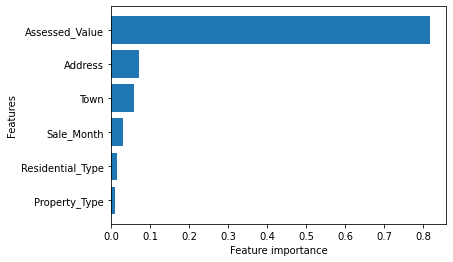

In [82]:
plot_features(X_train.columns, model.feature_importances_)

In [83]:
data1['Address'].value_counts()

56834    9
56980    9
131      8
56517    7
56540    5
        ..
46039    1
54970    1
46232    1
40181    1
15150    1
Name: Address, Length: 57028, dtype: int64

In [84]:
data1['Town'].value_counts()

127    2344
112    2019
87     1562
30     1548
130    1349
       ... 
122      21
14       11
82        3
108       2
32        1
Name: Town, Length: 144, dtype: int64

In [85]:
import pickle

# Save an existing model to file
pickle.dump(model, open("my_first_project_model3.pkl", "wb"))

In [86]:
loaded_pickle_model = pickle.load(open("my_first_project_model3.pkl", "rb"))

In [87]:
pickle_y_preds = loaded_pickle_model.predict(X_test)


In [88]:
pickle_y_preds

array([317483.75, 317483.75, 317483.75, ..., 317483.75, 317483.75,
       317483.75])